## More Matplotlib (Advanced Scatter, Bar Charts, Histograms)

This is my notebook to provide more work with Matplotlib (and practice with data wrangling in Python and the Pandas package). 

The quesiton of this lecture is: **Why are some countries rich, others poor?** Can't get any more fundemental then this. Like in the previous lecture, we will work through this "mini-project" to learn new features of Matplotlib. Specifically, (i) some advanced scatter (ii) bar charts and (iii) histograms. Along the way will also learn some data wrangeling skills, specifically `isin` command and then value of a good choice about the index for the dataframe. We will also use the `numpy` package for the first time and see how logorithims are very useful. 

In [1]:
import pandas as pd             # Bring in the Pandas Package
import matplotlib.pyplot as plt # Our plotting tool
import numpy as np              # Numberical Python, we will use this at the end.

The data set for which we will answer this question is the "Penn Worl Table" it is basicly a **comparable** dataset of country outcomes (e.g. GDP, Investment, etc). The key word here is **comparable.** What this means is that when we are comparing China's GDP to the US's GDP we are making an "apple to apple" comparaison.  Side note (in your work, you should be asking your self that question, is my data series comparable across time, space, etc.)

Now, this is a more complicated data set than what we previously worked with. So to save time, lets create some **wants** out of the data. 
- We want to know something about existing cross-country income inequalty. 
- We want to know somethign about how (say education) correlates with income inequalty.
I think that is enough for now...The first question can be answerd with a nice bar or even better histogram chart. The latter we can use a nice scatter plot. 

One final point on where we are going. We will first do this for one year. Its ok to start out small, the idea is execute the idea in a small way, then use your existing code to scale it up, say for many years.

#### Read in the data...

You should probably spend sometime looking at the dataset before we read it in. Be mindfull of how missing values are treated, the legend page provides good information on what each data series is, anything else we should watch out for?

In [2]:
#url = 'http://www.rug.nl/research/ggdc/data/pwt/v81/pwt81.xlsx' # This is the link from the book, its broken
url = "http://www.rug.nl/ggdc/docs/pwt81.xlsx"                   # Here is the correct link
pwt = pd.read_excel(url, sheetname='Data')                       # Then use the pd.read code to bring it in
                                                                 # note also the use of the option to call a specific
                                                                 # sheet here

In [3]:
pwt.head()

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_k
0,AGO,Angola,Kwanza,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AGO,Angola,Kwanza,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AGO,Angola,Kwanza,1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGO,Angola,Kwanza,1953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AGO,Angola,Kwanza,1954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ok, that was not that informative. Note all the missing values. Lets look at the tail.

In [4]:
pwt.tail()

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_k
10352,ZWE,Zimbabwe,US Dollar,2010,51233.429688,103468.859375,12.571454,7.139131,NaN,2.482342,...,0.129282,0.111090,-0.231622,0.448722,0.124802,0.223558,0.169569,0.282066,0.382754,4.071406
10353,ZWE,Zimbabwe,US Dollar,2011,55394.472656,182528.718750,12.754378,7.419909,NaN,2.482342,...,0.087710,0.084211,-0.203188,0.635951,0.141775,0.239443,0.183947,0.280428,0.408237,9.279992
10354,ZWE,Zimbabwe,Zimbabwe Dollar,2009,49126.156250,59191.949219,12.473992,7.143100,NaN,2.471725,...,0.109057,0.149547,-0.171139,0.060929,0.113076,0.198803,0.155077,0.259579,0.352583,3.617172
10355,ZWE,Zimbabwe,Zimbabwe Dollar,2010,51205.929688,103387.484375,12.571454,7.139131,NaN,2.482342,...,0.128692,0.111196,-0.231896,0.448722,0.124726,0.223262,0.170463,0.281990,0.382563,4.071406
10356,ZWE,Zimbabwe,Zimbabwe Dollar,2011,55368.285156,182377.171875,12.754378,7.419909,NaN,2.482342,...,0.087303,0.084297,-0.203424,0.635951,0.141691,0.239152,0.184941,0.280350,0.408063,9.279992


In [5]:
pwt.shape

(10357, 47)

Ok, so this is sizable. 

### Cross-Country Income Inequality for One Year
So lets think through the steps. First, we need to really only two things of the data: First, something about income or output per person. If we look at the data, I'll note that it has the componenets to construct income per person, but will will have to calculate it. Second, just that for the one year that we care about. So, I'm going to drop stuff from the dataframe accordingly.

In [6]:
pwt["gdp_pop"] = pwt["rgdpe"] / pwt["pop"] # This makes GDP per person or ``average income in that country''

pwt_2005 = pwt[pwt.year == 2005]           # This will get me just the 2005 year...


These types of operations on the dataframe should be feeling familiar. The first operation just creates a new series which is gdp per person in the country. The second operation just pulled out the year 2005 (which will simplfy the syntax below).

In [7]:
pwt_2005.head()  # Do this again, just to verify we have what we think we have...

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_k,gdp_pop
55,AGO,Angola,Kwanza,2005,52943.320312,61016.523438,16.489021,7.738189,NaN,NaN,...,0.700307,-0.202887,-0.083627,0.662680,0.576069,0.591150,0.493786,0.622956,0.560122,3210.822541
117,ALB,Albania,Lek,2005,16960.060547,17289.283203,3.141800,0.932000,NaN,2.993224,...,0.063309,-0.279105,-0.018865,0.526328,0.605834,0.207416,0.601361,0.541775,0.644332,5398.198659
179,ARG,Argentina,Argentine Peso,2005,409609.375000,399135.656250,38.681174,13.987501,1840.9,2.764784,...,0.150914,-0.113287,-0.003533,0.424934,0.484048,0.518339,0.665829,0.634466,0.440873,10589.372882
241,ARM,Armenia,Armenian Dram,2005,13478.196289,13923.870117,3.065954,1.128365,NaN,3.012273,...,0.099134,-0.215817,-0.011175,0.326691,0.543520,0.316758,0.678810,0.562906,0.509696,4396.085619
303,ATG,Antigua and Barbuda,East Caribbean Dollar,2005,1176.966309,894.290588,0.083916,0.036395,NaN,NaN,...,0.155397,-0.918621,0.266593,1.044244,1.526457,0.334405,0.868072,0.639315,1.941484,14025.529203



### Histograms

For this question, a histogram is a good place to start to illustrate how much income inequality there is. Lets learn how to do this.

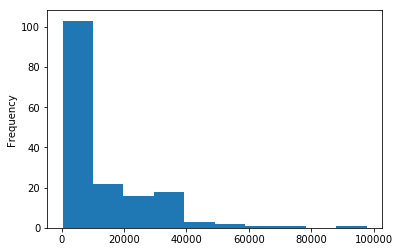

In [8]:
avg = pwt_2005.gdp_pop.mean()

fig, ax = plt.subplots()

pwt_2005.gdp_pop.plot(kind='hist', ax=ax) # Same deal, now we just changed the kind to 'hist' for histogram...

plt.show()

Ok, not bad. Now lets make this a bit more informative by adding some of th usual (titles, labels ), then some stuff to add context.

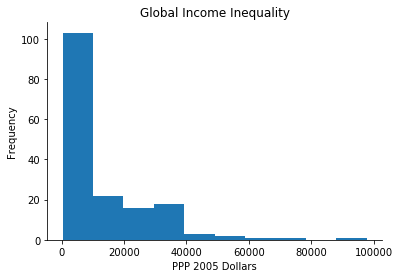

In [9]:

fig, ax = plt.subplots()

pwt_2005.gdp_pop.plot(kind='hist', ax=ax)

ax.set_xlabel("PPP 2005 Dollars")

ax.set_title("Global Income Inequality")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.show()


I think this is looking good. Let me add some context, I'm going to add two horizontal lines showing the world average and then the United States.

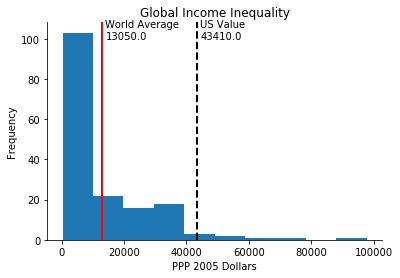

In [10]:
fig, ax = plt.subplots()

pwt_2005.gdp_pop.plot(kind='hist', ax=ax)

ax.set_xlabel("PPP 2005 Dollars")

ax.set_title("Global Income Inequality")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# All the stuff is the same as before... below is the new stuff.

avg = pwt_2005.gdp_pop.mean() # This computes the average value.


ax.axvline(x=avg,           # Set the value equall to the average
           color='r',       # make the color red
           label='Average', # this is the label (shows up in the legend)
           linestyle='-',   # the line style
           linewidth=2)     # thickness of the line

message = "World Average \n" + str(round(avg,-1)) # Create the message, convert the number to a string,
                                                  # then add it 
                                                  
ax.text(avg + 1000, # This is the placement on the x-axis, I'm shifting it righ to see it better
        100, # placement on the y-axis
        message,  # The message
        horizontalalignment='left') # then alling everything on the left.

usval = float(pwt_2005[pwt_2005.countrycode == "USA"].gdp_pop)
# Note how I'm doing this, I'm slicing the data frame by a boolean operation. So take the value
# where the countrycode is USA, return gdp_pop. The one issue here is that it returns a dataframe
# not a floating point value. So I use float to convert it.

ax.axvline(x= usval, color='k', label= "USA", linestyle='--', linewidth=2) # Put in the US Value
# Same deal as above

message = "US Value \n" + str(round(usval,-1))

ax.text(usval +1000, 100, message, horizontalalignment='left')
# Same deal as above.

plt.show()

What does it say? What else would you like to see? Is this hiding anything?

**Excercise:** Exlpore another year, how does it compare? Can you make a side by side plot of the histogram for two years?

How to display how much inequality there is? Let work through two different kind of plots. A bar chart (and we will have to simplify this) and a histogram.

### Bar Chart of Cross Country Income Inequality

First, I think the chart above displays an aspect of how much inequality there is across countries. But there are other ways to get at this issue. A bar chart is a way to provide a direct comparision of countries. Lets explore that. As usual, lets generate a quick bar chart. 


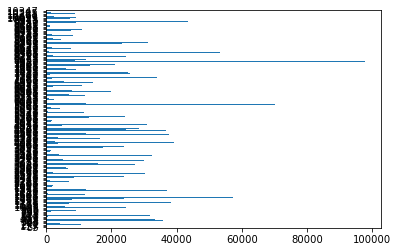

In [11]:
fig, ax = plt.subplots()

pwt_2005.gdp_pop.plot(kind='barh', ax=ax) # Same deal as usual, just changed the kind.

plt.show()

Ok, so that is **brutal**. This is going to need a lot of work. In fact, we might want to just give up on this idea...but lets push ahead a little bit. 

The first thing that I notice is that the y-axis is a mess. Lets simplify our lives and only look at a couple of countries first, the work from there. 

**Note we are taking a slight detour here to wrangle the data a bit**

We want to look at only a couple of countries. How do we pull them out? There are several ways to do this, I will show you two. ** But this is good practice to learn and manipulate data**

##### The .isin operation

Below I use a **Boolean** operation to only pull out a subset of the countries. Here I use this `.isin` operation:

In [12]:
country_list = ["USA", "GBR", "ARG", "TZA", "CHN"]           # My country list

subpwt = pwt_2005[pwt_2005.countrycode.isin(country_list)]   # First, inside the brackets, I'm looking at the country code, then
                                                             # use this .isin command, it will create a boolean that specifies 
                                                             # a true if the country code "is in" our list and a false otherwise
                                                             # Then since it is inside the brackets, this means that subpwt will
                                                             # only be that subset of countries.
                
                                                             # What if you just did inside the brackets, 
                                                             # pwt_2005.countrycode == country_list? Why would this not work.

subpwt.head() # Lets set if we did what we thought...

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_k,gdp_pop
179,ARG,Argentina,Argentine Peso,2005,4.096094e+05,3.991357e+05,38.681174,13.987501,1840.90,2.764784,...,0.150914,-0.113287,-0.003533,0.424934,0.484048,0.518339,0.665829,0.634466,0.440873,10589.372882
1915,CHN,"China, People's Republic of",Yuan Renminbi,2005,7.630084e+06,7.522393e+06,1284.823106,755.125000,NaN,2.459823,...,0.161457,-0.130350,0.008329,0.312700,0.364267,0.182004,0.627357,0.673050,0.305711,5938.626076
3465,GBR,United Kingdom,Pound Sterling,2005,1.961780e+06,1.931446e+06,60.202727,28.642519,1676.41,2.758831,...,0.287003,-0.360390,0.029175,1.129804,1.050549,1.462617,0.693387,0.740987,1.295023,32586.239823
9603,TZA,United Republic of Tanzania: Mainland,Tanzanian Shilling,2005,3.973751e+04,4.106662e+04,37.758024,18.611111,NaN,1.910643,...,0.057635,-0.133762,0.022292,0.339921,0.417389,0.344501,0.706324,0.591069,0.381243,1052.425617
9851,USA,United States,US Dollar,2005,1.288531e+07,1.256430e+07,296.820296,143.619202,1708.56,3.574813,...,0.100642,-0.193560,0.008379,0.956188,0.833753,1.396735,0.715181,0.712318,1.000000,43411.155415


Ok, so this looks good. We pulled out only those countries. Now lets plot it.

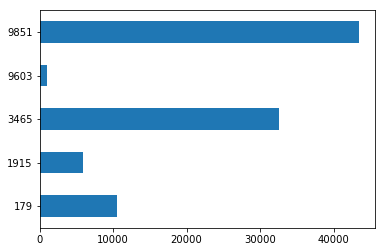

In [13]:
fig, ax = plt.subplots()

subpwt.gdp_pop.plot(kind='barh', ax=ax) 
plt.show()

Ok, this is nice in the sense that we see what is going on with the y-axis. It is labeling it with numerical codes. If we want to keep using this approach, then we would need to change it. 

#### Set the Index approach

We actually worked with the PWT earlier. And I posed the question, what is the natural index? In this case I would argue that here the natural index would be the country. Why? Well we removed the time dimension by only looking at the year 2005 and the fundemental unit of observation is the country here. 

By setting the index, it now lets us pull directly a subset of countries in a relativly easy way.

In [14]:
country_list = ["USA", "GBR", "ARG", "TZA", "CHN"] # Our country list

pwt_2005.set_index("countrycode",inplace = True)   # Now set the index to be the countrycode

pwt_2005.loc[country_list].head()                  # The use the `loc' operation. This pulls out the values associated with 
                                                   # the index location specified.

,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,ccon,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_k,gdp_pop
countrycode,,,,,,,,,,,,,,,,,,,,,
USA,United States,US Dollar,2005,1.288531e+07,1.256430e+07,296.820296,143.619202,1708.56,3.574813,1.062547e+07,...,0.100642,-0.193560,0.008379,0.956188,0.833753,1.396735,0.715181,0.712318,1.000000,43411.155415
GBR,United Kingdom,Pound Sterling,2005,1.961780e+06,1.931446e+06,60.202727,28.642519,1676.41,2.758831,1.646576e+06,...,0.287003,-0.360390,0.029175,1.129804,1.050549,1.462617,0.693387,0.740987,1.295023,32586.239823
ARG,Argentina,Argentine Peso,2005,4.096094e+05,3.991357e+05,38.681174,13.987501,1840.90,2.764784,3.065313e+05,...,0.150914,-0.113287,-0.003533,0.424934,0.484048,0.518339,0.665829,0.634466,0.440873,10589.372882
TZA,United Republic of Tanzania: Mainland,Tanzanian Shilling,2005,3.973751e+04,4.106662e+04,37.758024,18.611111,NaN,1.910643,3.478623e+04,...,0.057635,-0.133762,0.022292,0.339921,0.417389,0.344501,0.706324,0.591069,0.381243,1052.425617
CHN,"China, People's Republic of",Yuan Renminbi,2005,7.630084e+06,7.522393e+06,1284.823106,755.125000,NaN,2.459823,4.617393e+06,...,0.161457,-0.130350,0.008329,0.312700,0.364267,0.182004,0.627357,0.673050,0.305711,5938.626076


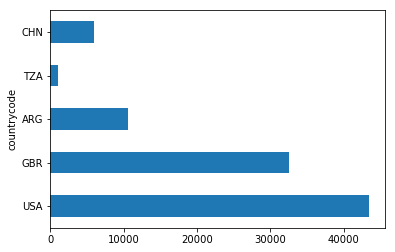

In [15]:
fig, ax = plt.subplots()

pwt_2005.loc[country_list].gdp_pop.plot(kind='barh', ax=ax) 
plt.show()

Now this is nice because, the y-axis automatically reports the **informative** country codes. Lets modify this a bit. 

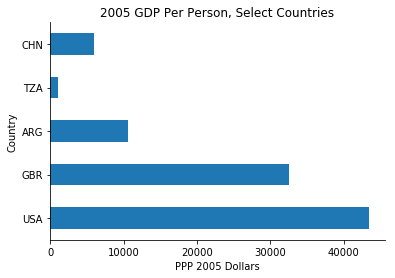

In [16]:
fig, ax = plt.subplots()

pwt_2005.loc[country_list].gdp_pop.plot(kind='barh', ax=ax) 

ax.set_title("2005 GDP Per Person, Select Countries")
ax.set_ylabel("Country")
ax.set_xlabel("PPP 2005 Dollars")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.show()


Now let me show you a couple of more "bells and whistles" to make this plot look nice. I'm going to add a vertical line illustrating mean gdp per person. Then I'm going to Change the country labels, so your boss does not start yelling, "What the hell does TZA stand for!!!"

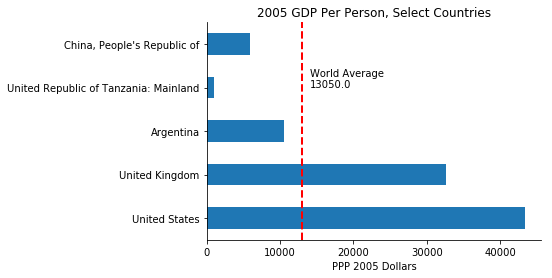

In [17]:
avg = pwt_2005.gdp_pop.mean()

fig, ax = plt.subplots()

pwt_2005.loc[country_list].gdp_pop.plot(kind='barh', ax=ax) 

ax.set_title("2005 GDP Per Person, Select Countries")
ax.set_ylabel("") #By Changing the labeling, having a ylabel saying country is redundent, so remove it.
ax.set_xlabel("PPP 2005 Dollars")

ax.set_yticklabels(pwt_2005.loc[country_list].country.tolist())

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.axvline(x=avg, color='r', label='Average', linestyle='--', linewidth=2)

message = "World Average \n" + str(round(avg,-1)) # Create the message, convert the number to a string,
                                                  # then add it 
ax.text(avg + 1000, # This is the placement on the x-axis, I'm shifting it righ to see it better
        3, # placement on the y-axis
        message,  # The message
        horizontalalignment='left') # then alling everything on the left.

plt.show()


What do you think? How could we make this better?

**Excercise** Explore some other countries. Can you change the color of one of the bars? Hint: See the book and the PISA score example. 

### Income Inequality and Education 

Now lets finish off with a fancy, bubble scatter plot. We will do this in the context of thinking about the role that the level of education in a country plays in determining its income level. 

Where do I get some education data. Turns out the Penn World Table already has this locked and loaded. The `hc` variable is a measure of human capital (as measured by economists). Basic idea, transform average years of schooling into an number that has economic content. 

So lets plot income level vs human capital.

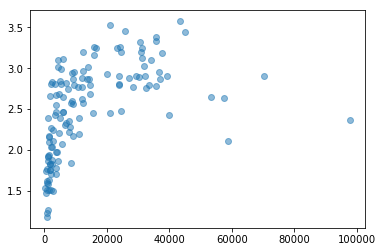

In [18]:
fix, ax = plt.subplots()

ax.scatter(pwt_2005["gdp_pop"], pwt_2005["hc"],     # x,y variables 
            alpha= 0.50) # Then this last command specifies how dark or light the bubbles are...

plt.show()

Hmmm...Is this what you expected? 

Here is the deal: note how the relationship looks like a curve. One way to get at this in a more transparent way is to take logarithims of both variables. Taking logs will also help scale things in a better way as well (expand on this).

Well how to I do this. Use the `numpy` package which works well with operations on data frame (note the `math` package which also has the log operation did not!). 

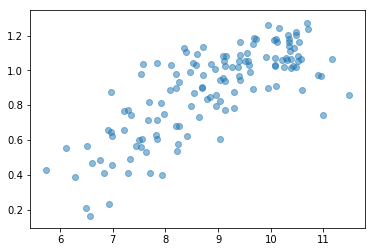

In [19]:
fig, ax = plt.subplots()

ax.scatter(np.log(pwt_2005["gdp_pop"]), np.log(pwt_2005["hc"]), # np.log() is taking a natural log transformation...
            alpha= 0.50) # Then this last command specifies how dark or light the bubbles are...

plt.show()


Now we are one to somthing. Here is a nice, clear relationship between human capital and GDP per person. There is one issue with log scale, what does 5 mean? Well take exp(5) and you get GDP per person in levels. **BUT WHAT IS EXP(5)!!!**, your boss yells. So lets change the lables on the x-axis.

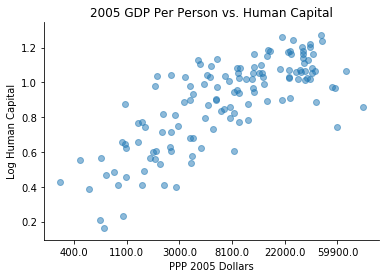

In [20]:
import numpy as np # Numerical Python Package, a key element of scientific computation in python

fig, ax = plt.subplots()

ax.scatter(np.log(pwt_2005["gdp_pop"]), np.log(pwt_2005["hc"]), # np.log() is taking a natural log transformation...
            alpha= 0.50) # Then this last command specifies how dark or light the bubbles are...


ax.set_title("2005 GDP Per Person vs. Human Capital")
ax.set_ylabel("Log Human Capital") 
ax.set_xlabel("PPP 2005 Dollars")

xlabel_list = np.exp(range(5,13)) # Now creat the list of lables by converting 5,6,etc. to levels
                                  # by taking exp.
xlabel_list = np.round(xlabel_list,-2) # Then round it so it looks nice.


ax.set_xticklabels(xlabel_list) # Then set the xtick labels.

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.show()

Ok, so this is looking great. I want to add one more thing. One issue implicit in this plot is that all countries are (visually) being treated the same. But should China be treated the same as Luxumberg? One way to illustrate that some countries have more people than others is to do a bubble scatter plot. Lets do this.

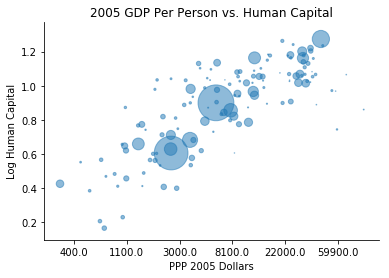

In [21]:
import numpy as np # Numerical Python Package, a key element of scientific computation in python

fig, ax = plt.subplots()

ax.scatter(np.log(pwt_2005["gdp_pop"]), np.log(pwt_2005["hc"]), # np.log() is taking a natural log transformation...
            s=pwt_2005['pop'], # THE NEW PART HERE! 
            alpha= 0.50) # Then this last command specifies how dark or light the bubbles are...


ax.set_title("2005 GDP Per Person vs. Human Capital")
ax.set_ylabel("Log Human Capital") 
ax.set_xlabel("PPP 2005 Dollars")

xlabel_list = np.exp(range(5,13)) # Now creat the list of lables by converting 5,6,etc. to levels
                                  # by taking exp.
xlabel_list = np.round(xlabel_list,-2) # Then round it so it looks nice.


ax.set_xticklabels(xlabel_list) # Then set the xtick labels.

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.show()

**AMAZING!** One thing to notice is how visually, this really changed things. In the previous graph above, there were some countries with high levels of GDP per person, but (relativly) low levels of human capital. To me at least, this gave the impression that maybe at higher income levels this relationship is more ambigous.

But with the bubbles, it makes clear that those outlying countreis are tiny. And now visually, there is a sharp, linear relationship observed between GDP per person and education. 

There is a lot more you could do with this graph. Let me suggest a couple of things:
- Change the x-ticks so they look less random
- Report some statistics about this, e.g. weighted correlation. Better yet, the relationship of a regression of income on human capital. Maybe even plot the best fit line? 

**Excercise** Explore another year? Again, can you plot them side by side to illustrate what is going on?

## Summary

Ok, so what have we learned...
- Histograms
- Some data wrangeling skills like seting the index in a smart way, or the  `isin` command
- Bar charts 
- Fancy scatter plots (and the value of logorithims)

And did it all on an interesting data set. Substantivly, we learned about the vast differences in living standards across countries. And how humand capital (i.e. education) strongly relate to the differences. Deep question, does human capital determine income level or does income level determine human capital?